In [286]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pandas.options.display.max_columns = None
pandas.options.display.max_rows = None

song_data = pandas.read_csv("songs_normalize.csv")

song_data

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.8340,1,-5.444,0,0.0437,0.300000,0.000018,0.3550,0.8940,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.8970,0,-4.918,1,0.0488,0.010300,0.000000,0.6120,0.6840,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.4960,7,-9.007,1,0.0290,0.173000,0.000000,0.2510,0.2780,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.9130,0,-4.063,0,0.0466,0.026300,0.000013,0.3470,0.5440,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.9280,8,-4.806,0,0.0516,0.040800,0.001040,0.0845,0.8790,172.656,pop
5,Sisqo,Thong Song,253733,True,1999,69,0.706,0.8880,2,-6.959,1,0.0654,0.119000,0.000096,0.0700,0.7140,121.549,"hip hop, pop, R&B"
6,Eminem,The Real Slim Shady,284200,True,2000,86,0.949,0.6610,5,-4.244,0,0.0572,0.030200,0.000000,0.0454,0.7600,104.504,hip hop
7,Robbie Williams,Rock DJ,258560,False,2000,68,0.708,0.7720,7,-4.264,1,0.0322,0.026700,0.000000,0.4670,0.8610,103.035,"pop, rock"
8,Destiny's Child,Say My Name,271333,False,1999,75,0.713,0.6780,5,-3.525,0,0.1020,0.273000,0.000000,0.1490,0.7340,138.009,"pop, R&B"
9,Modjo,Lady - Hear Me Tonight,307153,False,2001,77,0.720,0.8080,6,-5.627,1,0.0379,0.007930,0.029300,0.0634,0.8690,126.041,Dance/Electronic


## 1. Out of the Spotify Top Hits, are there more explicit songs or non-explicit songs?

<AxesSubplot:xlabel='explicit', ylabel='count'>

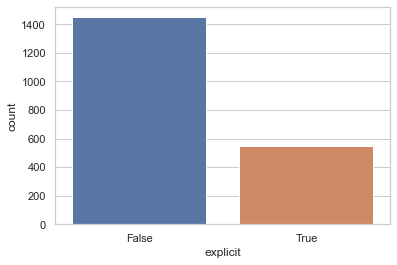

In [295]:
# trying to figure out a way to make two columns (explicit and not explicit)
sns.countplot(x="explicit", data=song_data)

## 2. What is the percentage of explicit songs in 1999?

In [293]:
year_ninetynine = song_data['year'] == 1999 # total songs from 1999
explicit_songs = song_data['explicit'] == True # explicit songs
ninetynine_songs = song_data[year_ninetynine & explicit_songs] # explicit songs from 99


len(ninetynine_songs)/len(year_ninetynine)*100 # percentage of explicit songs in 1999

0.4

## 3. What is the percentage of explicit songs in 2019?

In [307]:
year_nineteen = song_data['year'] == 2019 # total songs from 1999
explicit_songs = song_data['explicit'] == True # non-explicit songs
nineteen_songs = song_data[year_nineteen & explicit_songs] # explicit songs from 99

# len(year_nineteen)
# len(nineteen_songs)

len(nineteen_songs)/len(year_nineteen)*100 # percentage of explicit songs in 1999

1.8499999999999999

## 4. Which genres consist of higher numbers of Spotify Top Hits?

In [ ]:
genres = {} # making dictionary of genres and their number of hits
sns.barplot(x="genre", y="Number of Hit Songs", data=top_artists)

## 5. What is the average amount of streams a song gets in order to be a Spotify Top Hit per year? 

In [ ]:
# x axis year, y axis streams

## 6. What is the amount of Spotify Top Hits per year

In [ ]:
# x axis year, y axis amount

## 7. On average, which Spotify hits were the loudest by year?

In [318]:
# x axis year, y axis loudness
popular_songs = song_data[song_data["popularity"]==70]
# unpopular_songs_plot = sns.barplot(x="artist", y="popularity", data=unpopular_songs)
popular_songs

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
68,Craig David,7 Days,235133,False,2000,70,0.659,0.812,4,-7.499,0,0.0487,0.230000,0.000000,0.0951,0.8880,83.014,"hip hop, pop, R&B"
75,Destiny's Child,"Jumpin', Jumpin'",230200,False,1999,70,0.771,0.685,1,-4.639,1,0.0567,0.005430,0.001570,0.0537,0.6830,88.997,"pop, R&B"
91,Backstreet Boys,Shape of My Heart,230093,False,2000,70,0.575,0.786,9,-4.353,1,0.0296,0.252000,0.000000,0.1590,0.5180,96.102,pop
101,Destiny's Child,Survivor,254026,False,2001,70,0.514,0.911,1,-2.027,0,0.4100,0.055900,0.000000,0.7750,0.6190,161.109,"pop, R&B"
270,Missy Elliott,Work It,263226,True,2002,70,0.884,0.677,1,-5.603,1,0.2830,0.077800,0.000000,0.0732,0.5840,101.868,"hip hop, pop, R&B"
275,Ashanti,Foolish,227386,True,2002,70,0.665,0.695,0,-5.763,1,0.0532,0.347000,0.000000,0.1060,0.7070,90.119,"hip hop, pop, R&B"
289,Puddle Of Mudd,She Hates Me,216760,True,2001,70,0.580,0.748,4,-5.433,1,0.0323,0.009350,0.000000,0.7530,0.5840,109.781,"rock, metal"
306,Jennifer Lopez,Jenny from the Block (feat. Jadakiss & Styles ...,187840,False,2002,70,0.845,0.768,6,-5.448,1,0.1880,0.007330,0.000005,0.0575,0.9600,100.000,"hip hop, pop, R&B"
317,DMX,X Gon' Give It To Ya,217586,True,2007,70,0.761,0.899,10,-3.090,0,0.1830,0.013500,0.000000,0.0719,0.6730,95.027,"hip hop, pop"
345,Limp Bizkit,Behind Blue Eyes,269973,False,2003,70,0.595,0.489,7,-6.660,1,0.0271,0.497000,0.000000,0.1190,0.0902,120.315,metal


## 8. Which artists have the most Spotify Top Hits?

In [258]:
artist_count = {} # making dictionary of artists and their number of hits

for artist in song_data['artist'].unique():
    count = song_data[ song_data['artist'] == artist].count().artist
    artist_count[artist] = count
    
sorted_artist_name = [] # sorted list of each artist's name
sorted_artist_count = [] # sorted list of each artist's number of top hits
for artist in sorted(artist_count, key=artist_count.get, reverse=True):
    sorted_artist_count.append(artist_count[artist])
    sorted_artist_name.append(artist)  
    
data = {'Artist':sorted_artist_name, 'Number of Hit Songs': sorted_artist_count} # creating new data frame
artist_df = pd.DataFrame(data)
artist_df

,Artist,Number of Hit Songs
0,Rihanna,25
1,Drake,23
2,Eminem,21
3,Calvin Harris,20
4,Britney Spears,19
5,David Guetta,18
6,Kanye West,17
7,Chris Brown,17
8,Beyoncé,16
9,Katy Perry,16


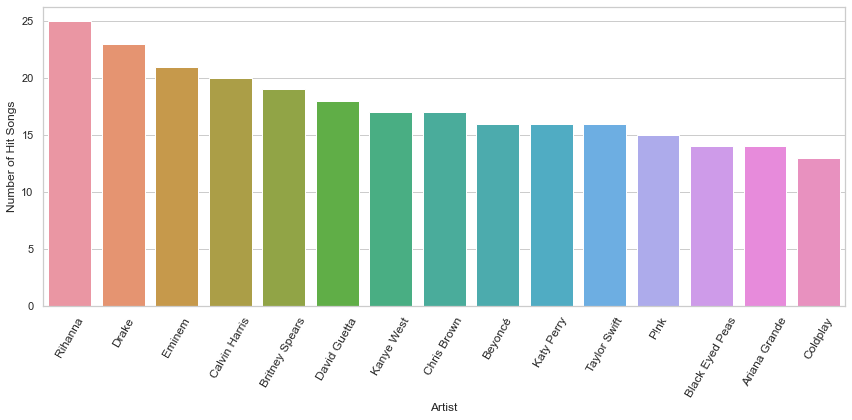

In [276]:
# Making bar plot 
top_artists = artist_df.iloc[:15] # getting top 15 artists

plt.figure(figsize=(12,6)) # larger figure

top_artists_plot = sns.barplot(x="Artist", y="Number of Hit Songs", data=top_artists)

top_artists_plot.set_xticklabels(top_artists_plot.get_xticklabels(), rotation=60, ha="center") # rotating ticks
top_artists_plot.set_xticklabels(top_artists_plot.get_xticklabels(), fontsize=12) # adjusting font size of ticks
plt.tight_layout()
plt.show()


## 9. How many artists have the least amount of Spotify Top Hits?

In [283]:
last_artists = artist_df[artist_df["Number of Hit Songs"]==1]

len(last_artists)

494

## 10. Compare the graphs from Question #6 and Question #7 and Question #8